# Unit 5 - Financial Planning

In [102]:
# Initial imports
import os
import requests
import pandas as pd
import datetime as dt
from datetime import date, timedelta
from dotenv import load_dotenv
import yfinance as yf
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [103]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [104]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [105]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Execute get request, format as JSON, and store response
btc_json = requests.get(btc_url).json()
eth_json = requests.get(eth_url).json()

# Add Indents to JSON and output to screen
print(json.dumps(btc_json, indent=4))
print(json.dumps(eth_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19280300,
            "total_supply": 19280300,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 23449.0,
                    "volume_24h": 42929789212,
                    "market_cap": 452186926095,
                    "percentage_change_1h": 0.160220549767618,
                    "percentage_change_24h": -1.5196303021958,
                    "percentage_change_7d": 1.84285157680974,
                    "percent_change_1h": 0.160220549767618,
                    "percent_change_24h": -1.5196303021958,
                    "percent_change_7d": 1.84285157680974
                },
                "CAD": {
                    "price": 31855.4665,
                    "volume_24h": 58320118644.502,
                    "mar

In [106]:
# Fetch current BTC price
btc_amount = btc_json['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_amount = eth_json['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crypto
my_btc_value = my_btc * btc_amount
my_eth_value = my_eth * eth_amount

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38226.56
The current value of your 5.3 ETH is $11835.73


### Collect Investments Data Using yFinance: `SPY` (stocks) and `AGG` (bonds)

In [107]:
# Set current amount of shares
my_agg = 200
my_spy = 50

# Set shares into a DataFrame
shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame with 'tickers' as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [108]:
# Initialize DataFrame for AGG and SPY

# Set datetime format for one year
sd = dt.datetime(2022, 1, 11)
ed = dt.datetime(2023, 1, 11)

# Create a DataFrame for AGG and SPY
AGG_SPY = yf.Tickers("AGG SPY")
AGG_SPY_1d = AGG_SPY.history(period = "1d")
AGG_SPY_1d

[*********************100%***********************]  2 of 2 completed


Capital Gains            Close             Dividends       \
                     AGG  SPY         AGG         SPY       AGG  SPY   
Date                                                                   
2023-02-02           0.0  0.0  100.790001  416.779999       0.0  0.0   

                  High                     Low                    Open  \
                   AGG         SPY         AGG         SPY         AGG   
Date                                                                     
2023-02-02  101.150002  418.309998  100.739998  412.880005  101.040001   

                       Stock Splits        Volume             
                   SPY          AGG  SPY      AGG        SPY  
Date                                                          
2023-02-02  414.859985          0.0  0.0  9197800  101455700

In [109]:
# Pick AGG and SPY close prices
agg_close_price = float(AGG_SPY_1d["Close"]["AGG"])
spy_close_price = float(AGG_SPY_1d["Close"]["SPY"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $100.79
Current SPY closing price: $416.78


In [110]:
# Compute the current value of shares
my_agg_value = agg_close_price * df_shares.loc['AGG']['shares']
my_spy_value = spy_close_price * df_shares.loc['SPY']['shares']

# Print current value of shares
print(f"The current value of your {df_shares.loc['AGG']['shares']} SPY shares is ${my_agg_value:0.2f}")
print(f"The current value of your {df_shares.loc['SPY']['shares']} AGG shares is ${my_spy_value:0.2f}")

The current value of your 200 SPY shares is $20158.00
The current value of your 50 AGG shares is $20839.00


### Savings Health Analysis

In [111]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = (my_btc_value + my_eth_value)
shares_value = (my_agg_value + my_spy_value)

# Create savings DataFrame
amount = {
    "amount": [crypto_value, shares_value]
}

# Set asset index
assets = ["crypto", "shares"]
df_savings = pd.DataFrame(amount, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,50062.289992
shares,40997.000122


<AxesSubplot:title={'center':'Investment Portfolio'}, ylabel='amount'>

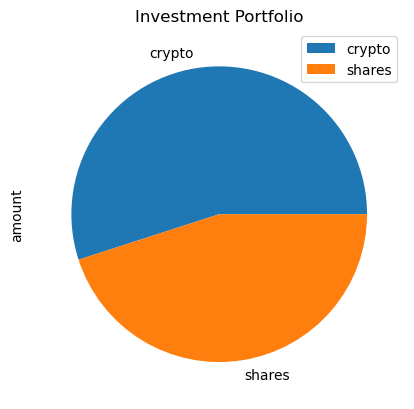

In [112]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Investment Portfolio")

In [113]:
# Assign total sum of savings into a variable 
df_savings_total = sum(df_savings['amount'])
display(df_savings_total)
print(type(df_savings_total))

91059.29011407032

<class 'float'>


In [114]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
cash_difference = df_savings_total - emergency_fund
display(cash_difference)
print(f"There is a ${cash_difference:0.2f} difference.")
print(type(cash_difference))

55059.29011407032

There is a $55059.29 difference.
<class 'float'>


In [115]:
# Validate saving health
if df_savings_total > emergency_fund:
    print(f"Congratulations! You have ${cash_difference:0.2f} extra in your emergency fund.")
elif df_savings_total == emergency_fund:
    print("Yikes! just enough.")
else:
    print(f"Not enough in savings, I'm ${cash_difference:0.2f} down from the goal.")

Congratulations! You have $55059.29 extra in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [116]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
sd = dt.datetime(2018, 1, 11)
ed = dt.datetime(2023, 1, 11)

In [117]:
# Get 5 years' worth of historical data for SPY and AGG
# Reorganize the DataFrame
# Separate ticker data
spy = pd.DataFrame(yf.Ticker("SPY").history(start = sd, end = ed))
spy.rename(columns = {"Open":"open", "High":"high", "Low":"low", "Close":"close", "Volume":"volume", "Dividends":"dividend", "Stock Splits":"stock splits"}, inplace = True)
agg = pd.DataFrame(yf.Ticker("AGG").history(start = sd, end = ed))
agg.rename(columns = {"Open":"open", "High":"high", "Low":"low", "Close":"close", "Volume":"volume", "Dividends":"dividend", "Stock Splits":"stock splits"}, inplace = True)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([spy, agg], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.head()

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-11 00:00:00-05:00  252.257070  253.514908  252.082622  253.514908   
2018-01-12 00:00:00-05:00  253.790388  255.342007  253.478198  255.167587   
2018-01-16 00:00:00-05:00  256.480511  257.159920  253.570016  254.295349   
2018-01-17 00:00:00-05:00  255.268570  257.123189  254.295351  256.719208   
2018-01-18 00:00:00-05:00  256.599912  257.040598  255.773570  256.287750   

                                                                          \
                              volume dividend stock splits Capital Gains   
Date                                                                       
2018-01-11 00:00:00-05:00   62361500      0.0          0.0           0.0   
2018-01-12 00:00:00-05:00   90816100      0.0          0.0           0.0   
2018-01-16 00:00:00-05:00  106555100      0.0          0.0           0.0   
2018-01-17 00:00:00-05:00  113258800      0.0          0.0           0.0   
2018-01-18 00:00:00-05:00  100728000      0.0          0.0           0.0   

                                 AGG                                   \
                                open       high        low      close   
Date                                                                    
2018-01-11 00:00:00-05:00  95.986479  96.163149  95.942308  96.074814   
2018-01-12 00:00:00-05:00  95.968801  96.136643  95.959966  96.057137   
2018-01-16 00:00:00-05:00  96.171991  96.269161  96.039484  96.083649   
2018-01-17 00:00:00-05:00  96.048309  96.145473  95.951138  95.977638   
2018-01-18 00:00:00-05:00  95.783305  95.871640  95.712634  95.765640   

                                                                        
                            volume dividend stock splits Capital Gains  
Date                                                                    
2018-01-11 00:00:00-05:00  3470400      0.0          0.0           0.0  
2018-01-12 00:00:00-05:00  3605900      0.0          0.0           0.0  
2018-01-16 00:00:00-05:00  6794400      0.0          0.0           0.0  
2018-01-17 00:00:00-05:00  3146300      0.0          0.0           0.0  
2018-01-18 00:00:00-05:00  2896500      0.0          0.0           0.0

In [118]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [119]:
# Printing the simulation input data
mc_stock_data.portfolio_data.head()

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-11 00:00:00-05:00  252.257070  253.514908  252.082622  253.514908   
2018-01-12 00:00:00-05:00  253.790388  255.342007  253.478198  255.167587   
2018-01-16 00:00:00-05:00  256.480511  257.159920  253.570016  254.295349   
2018-01-17 00:00:00-05:00  255.268570  257.123189  254.295351  256.719208   
2018-01-18 00:00:00-05:00  256.599912  257.040598  255.773570  256.287750   

                                                                          \
                              volume dividend stock splits Capital Gains   
Date                                                                       
2018-01-11 00:00:00-05:00   62361500      0.0          0.0           0.0   
2018-01-12 00:00:00-05:00   90816100      0.0          0.0           0.0   
2018-01-16 00:00:00-05:00  106555100      0.0          0.0           0.0   
2018-01-17 00:00:00-05:00  113258800      0.0          0.0           0.0   
2018-01-18 00:00:00-05:00  100728000      0.0          0.0           0.0   

                                              AGG                        \
                          daily_return       open       high        low   
Date                                                                      
2018-01-11 00:00:00-05:00          NaN  95.986479  96.163149  95.942308   
2018-01-12 00:00:00-05:00     0.006519  95.968801  96.136643  95.959966   
2018-01-16 00:00:00-05:00    -0.003418  96.171991  96.269161  96.039484   
2018-01-17 00:00:00-05:00     0.009532  96.048309  96.145473  95.951138   
2018-01-18 00:00:00-05:00    -0.001681  95.783305  95.871640  95.712634   

                                                                     \
                               close   volume dividend stock splits   
Date                                                                  
2018-01-11 00:00:00-05:00  96.074814  3470400      0.0          0.0   
2018-01-12 00:00:00-05:00  96.057137  3605900      0.0          0.0   
2018-01-16 00:00:00-05:00  96.083649  6794400      0.0          0.0   
2018-01-17 00:00:00-05:00  95.977638  3146300      0.0          0.0   
2018-01-18 00:00:00-05:00  95.765640  2896500      0.0          0.0   

                                                      
                          Capital Gains daily_return  
Date                                                  
2018-01-11 00:00:00-05:00           0.0          NaN  
2018-01-12 00:00:00-05:00           0.0    -0.000184  
2018-01-16 00:00:00-05:00           0.0     0.000276  
2018-01-17 00:00:00-05:00           0.0    -0.001103  
2018-01-18 00:00:00-05:00           0.0    -0.002209

In [120]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\norma\Desktop\Jupyter-Workspace\Module_5\Assignment\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999554,1.004437,1.000252,0.997240,0.995780,1.005022,0.994123,0.993653,0.998477,0.991702,...,1.015157,0.991504,1.002534,1.015980,0.993439,1.000845,0.997875,1.000181,0.996211,0.998301
2,1.006944,1.013531,1.002027,0.998570,1.010329,1.015859,0.989943,1.003924,0.996973,0.987336,...,1.020107,0.998647,0.999028,1.008279,1.003282,1.003592,0.994938,1.002813,0.997590,1.003272
3,1.004268,1.016501,0.998589,1.008316,1.017151,1.017870,0.993522,0.996855,0.996581,0.986714,...,1.027883,0.997482,1.001817,1.007689,1.002218,0.999576,0.998150,1.015633,1.003474,1.013118
4,1.013955,1.004520,0.993929,1.004031,1.018922,1.005553,0.988004,1.006460,1.000856,0.981606,...,1.041604,0.990486,0.997056,1.005789,0.989866,0.994569,1.004394,1.014669,1.011739,1.007528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.677943,1.863460,5.689527,3.690962,11.703336,9.049918,2.056444,4.048604,3.103245,6.072681,...,4.467338,3.948335,3.885504,12.422445,10.034946,3.350227,12.466756,5.341932,10.386336,5.151309
7557,6.682895,1.872354,5.684163,3.715508,11.695428,9.123077,2.063503,4.045614,3.116605,6.012277,...,4.498354,3.933059,3.900188,12.494774,9.994708,3.350898,12.547092,5.319546,10.377004,5.179354
7558,6.758798,1.855506,5.696767,3.709066,11.694255,9.083789,2.078089,4.024963,3.088583,6.118922,...,4.465698,3.916071,3.903885,12.506855,9.952077,3.336894,12.642065,5.323885,10.509834,5.134928
7559,6.804202,1.861275,5.629650,3.724917,11.571793,9.092457,2.074961,4.021425,3.082579,6.119404,...,4.487456,3.941539,3.892278,12.472219,9.971981,3.316368,12.868268,5.347480,10.490801,5.177977


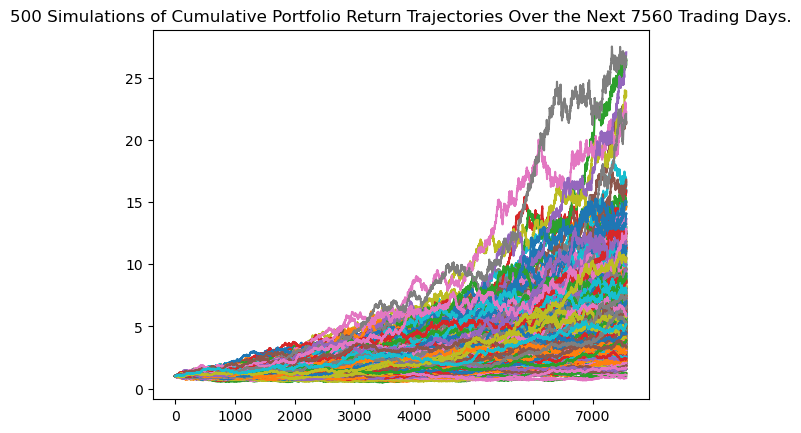

In [121]:
# Plot simulation outcomes
line_plot = mc_stock_data.plot_simulation()

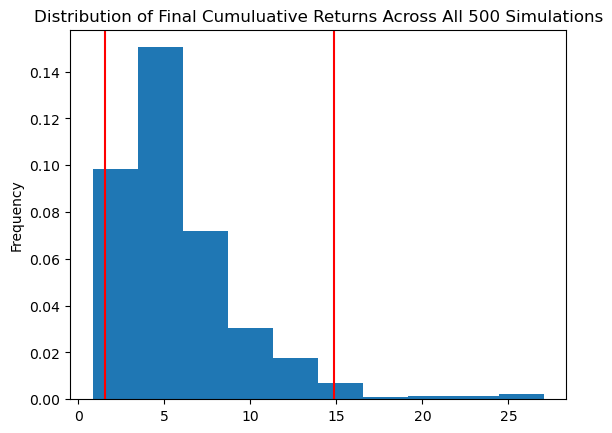

In [122]:
# Plot probability distribution and confidence intervals
dist_plot = mc_stock_data.plot_distribution()

### Retirement Analysis

In [123]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stat = mc_stock_data.summarize_cumulative_return()

# Print summary statistics
print(summ_stat)

count           500.000000
mean              5.809925
std               3.758421
min               0.852952
25%               3.375915
50%               4.911774
75%               7.164578
max              27.049269
95% CI Lower      1.573639
95% CI Upper     14.879594
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [124]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summ_stat[8]*initial_investment,2)
ci_upper = round(summ_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $31472.78 and $297591.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [125]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summ_stat[8]*initial_investment,2)
ci_upper = round(summ_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $47209.17 and $446387.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [126]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Higher Stock to Bond ratio
mc_stock_data_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*5
)

mc_stock_data_5yr.portfolio_data.head()

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-11 00:00:00-05:00  252.257070  253.514908  252.082622  253.514908   
2018-01-12 00:00:00-05:00  253.790388  255.342007  253.478198  255.167587   
2018-01-16 00:00:00-05:00  256.480511  257.159920  253.570016  254.295349   
2018-01-17 00:00:00-05:00  255.268570  257.123189  254.295351  256.719208   
2018-01-18 00:00:00-05:00  256.599912  257.040598  255.773570  256.287750   

                                                                          \
                              volume dividend stock splits Capital Gains   
Date                                                                       
2018-01-11 00:00:00-05:00   62361500      0.0          0.0           0.0   
2018-01-12 00:00:00-05:00   90816100      0.0          0.0           0.0   
2018-01-16 00:00:00-05:00  106555100      0.0          0.0           0.0   
2018-01-17 00:00:00-05:00  113258800      0.0          0.0           0.0   
2018-01-18 00:00:00-05:00  100728000      0.0          0.0           0.0   

                                              AGG                        \
                          daily_return       open       high        low   
Date                                                                      
2018-01-11 00:00:00-05:00          NaN  95.986479  96.163149  95.942308   
2018-01-12 00:00:00-05:00     0.006519  95.968801  96.136643  95.959966   
2018-01-16 00:00:00-05:00    -0.003418  96.171991  96.269161  96.039484   
2018-01-17 00:00:00-05:00     0.009532  96.048309  96.145473  95.951138   
2018-01-18 00:00:00-05:00    -0.001681  95.783305  95.871640  95.712634   

                                                                     \
                               close   volume dividend stock splits   
Date                                                                  
2018-01-11 00:00:00-05:00  96.074814  3470400      0.0          0.0   
2018-01-12 00:00:00-05:00  96.057137  3605900      0.0          0.0   
2018-01-16 00:00:00-05:00  96.083649  6794400      0.0          0.0   
2018-01-17 00:00:00-05:00  95.977638  3146300      0.0          0.0   
2018-01-18 00:00:00-05:00  95.765640  2896500      0.0          0.0   

                                                      
                          Capital Gains daily_return  
Date                                                  
2018-01-11 00:00:00-05:00           0.0          NaN  
2018-01-12 00:00:00-05:00           0.0    -0.000184  
2018-01-16 00:00:00-05:00           0.0     0.000276  
2018-01-17 00:00:00-05:00           0.0    -0.001103  
2018-01-18 00:00:00-05:00           0.0    -0.002209

In [127]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_stock_data_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\norma\Desktop\Jupyter-Workspace\Module_5\Assignment\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014634,1.000731,0.992277,1.002519,0.988989,0.998848,1.014175,0.999105,0.982553,1.014300,...,0.981015,0.989975,1.016931,0.994832,0.982891,0.989634,1.006906,0.986254,1.012662,0.979496
2,1.005808,1.014624,0.997435,0.988064,0.988941,0.986719,1.009479,0.978983,0.986404,1.004081,...,0.970775,1.011007,1.007916,0.982935,0.986032,0.986185,0.995561,0.989140,1.018235,0.987315
3,1.015773,1.003037,0.996829,0.985816,0.983393,0.996036,1.002058,0.980201,0.995445,0.989591,...,0.975956,1.011891,0.995151,0.981942,0.988583,0.990382,1.000535,0.987148,1.027125,0.977930
4,1.041801,1.016851,0.991276,0.981248,0.964679,0.988558,0.997787,0.991244,0.995530,0.996823,...,0.983414,1.011348,0.991521,0.996232,1.003519,0.977324,0.996039,0.989823,1.009152,0.968563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.087142,1.816574,0.886368,1.448260,1.687480,1.354564,1.322722,1.655067,1.140637,1.108251,...,1.541279,1.852748,1.394516,1.613369,2.537730,3.037941,1.565850,0.632861,1.655576,1.024968
1257,1.085834,1.820439,0.888593,1.472973,1.704210,1.363249,1.315314,1.684054,1.165507,1.105059,...,1.515160,1.858836,1.393212,1.589039,2.573490,3.025665,1.562761,0.633579,1.665146,1.014449
1258,1.077886,1.820894,0.886232,1.462798,1.700153,1.377116,1.303085,1.714278,1.168147,1.106185,...,1.524021,1.853720,1.386906,1.557503,2.518267,3.009457,1.571554,0.630898,1.647508,1.018243
1259,1.096372,1.833943,0.893376,1.456195,1.700816,1.392818,1.311878,1.713932,1.169329,1.106436,...,1.533775,1.873176,1.385572,1.566631,2.498389,3.016077,1.550971,0.636059,1.653448,1.005573


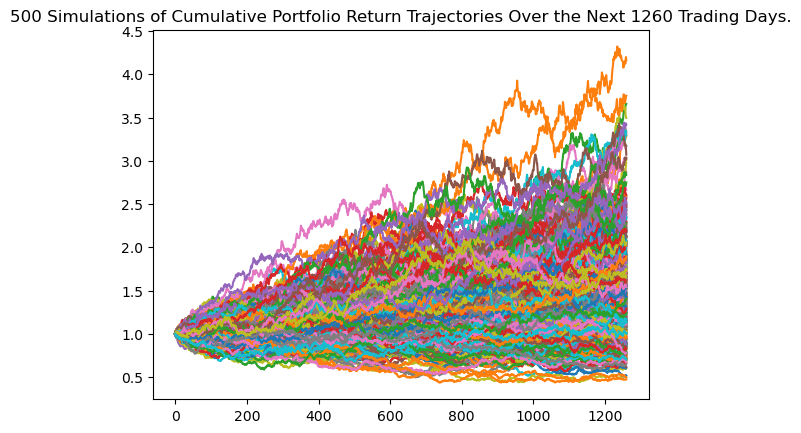

In [128]:
# Plot simulation outcomes
line_plot_5yr = mc_stock_data_5yr.plot_simulation()

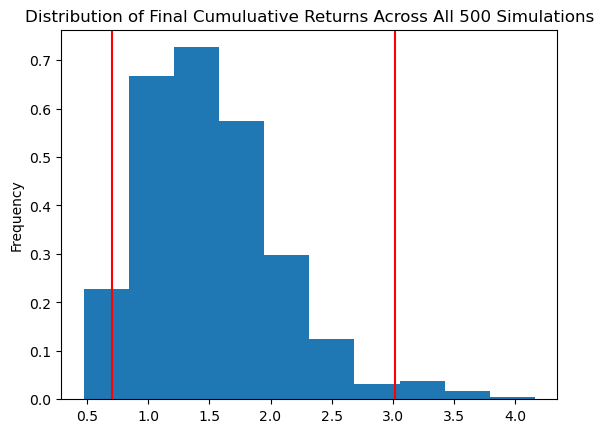

In [129]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = mc_stock_data_5yr.plot_distribution()

In [130]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stat_5yr = mc_stock_data_5yr.summarize_cumulative_return()

# Print summary statistics
print(summ_stat_5yr)

count           500.000000
mean              1.517315
std               0.572270
min               0.473428
25%               1.101722
50%               1.433466
75%               1.827602
max               4.163204
95% CI Lower      0.705945
95% CI Upper      3.020661
Name: 1260, dtype: float64


In [131]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summ_stat_5yr[8]*initial_investment,2)
ci_upper_five = round(summ_stat_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $42356.68 and $181239.67


### Ten Years Retirement Option

In [132]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_stock_data_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

mc_stock_data_10yr.portfolio_data.head()

SPY                                      \
                                 open        high         low       close   
Date                                                                        
2018-01-11 00:00:00-05:00  252.257070  253.514908  252.082622  253.514908   
2018-01-12 00:00:00-05:00  253.790388  255.342007  253.478198  255.167587   
2018-01-16 00:00:00-05:00  256.480511  257.159920  253.570016  254.295349   
2018-01-17 00:00:00-05:00  255.268570  257.123189  254.295351  256.719208   
2018-01-18 00:00:00-05:00  256.599912  257.040598  255.773570  256.287750   

                                                                          \
                              volume dividend stock splits Capital Gains   
Date                                                                       
2018-01-11 00:00:00-05:00   62361500      0.0          0.0           0.0   
2018-01-12 00:00:00-05:00   90816100      0.0          0.0           0.0   
2018-01-16 00:00:00-05:00  106555100      0.0          0.0           0.0   
2018-01-17 00:00:00-05:00  113258800      0.0          0.0           0.0   
2018-01-18 00:00:00-05:00  100728000      0.0          0.0           0.0   

                                              AGG                        \
                          daily_return       open       high        low   
Date                                                                      
2018-01-11 00:00:00-05:00          NaN  95.986479  96.163149  95.942308   
2018-01-12 00:00:00-05:00     0.006519  95.968801  96.136643  95.959966   
2018-01-16 00:00:00-05:00    -0.003418  96.171991  96.269161  96.039484   
2018-01-17 00:00:00-05:00     0.009532  96.048309  96.145473  95.951138   
2018-01-18 00:00:00-05:00    -0.001681  95.783305  95.871640  95.712634   

                                                                     \
                               close   volume dividend stock splits   
Date                                                                  
2018-01-11 00:00:00-05:00  96.074814  3470400      0.0          0.0   
2018-01-12 00:00:00-05:00  96.057137  3605900      0.0          0.0   
2018-01-16 00:00:00-05:00  96.083649  6794400      0.0          0.0   
2018-01-17 00:00:00-05:00  95.977638  3146300      0.0          0.0   
2018-01-18 00:00:00-05:00  95.765640  2896500      0.0          0.0   

                                                      
                          Capital Gains daily_return  
Date                                                  
2018-01-11 00:00:00-05:00           0.0          NaN  
2018-01-12 00:00:00-05:00           0.0    -0.000184  
2018-01-16 00:00:00-05:00           0.0     0.000276  
2018-01-17 00:00:00-05:00           0.0    -0.001103  
2018-01-18 00:00:00-05:00           0.0    -0.002209

In [133]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_stock_data_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\norma\Desktop\Jupyter-Workspace\Module_5\Assignment\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992739,1.000360,1.013002,0.998839,0.990254,0.995090,0.998257,0.996046,0.991852,0.996413,...,1.001687,0.996875,1.001298,0.999130,1.008198,1.002735,1.002373,0.994238,0.999743,0.988717
2,0.997276,0.996076,1.024904,1.003752,0.993030,0.982962,1.007354,1.009155,0.988555,1.001996,...,0.996375,1.012193,1.003724,1.000379,1.004009,1.003171,1.016653,0.982827,1.001825,0.988879
3,0.989772,1.000648,1.032995,1.000746,0.988566,0.983658,1.014356,1.014467,0.978850,0.996547,...,1.000558,1.022918,0.998102,0.992908,1.001710,1.009634,1.011025,0.993976,1.008358,0.997072
4,0.989573,0.996298,1.034728,1.005648,0.991077,0.985285,1.015274,1.019418,0.975599,0.994421,...,0.994302,1.025474,1.010290,0.995610,1.008927,1.014382,1.012406,0.992868,1.008450,1.003787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.319288,0.867061,1.586669,1.486041,1.087602,1.184249,1.398287,1.355910,1.808759,1.521258,...,1.306681,0.908676,1.192026,1.269261,1.455154,1.352099,1.794644,1.711733,1.830264,1.095410
1257,1.324342,0.870908,1.572477,1.477618,1.076803,1.181714,1.419356,1.347641,1.779272,1.507880,...,1.319129,0.916408,1.195299,1.292452,1.460428,1.363738,1.769432,1.720675,1.848030,1.093731
1258,1.328617,0.861003,1.573857,1.483076,1.083260,1.172016,1.425069,1.342611,1.770904,1.500151,...,1.316845,0.919081,1.190709,1.296023,1.470319,1.379544,1.775436,1.710030,1.849736,1.091891
1259,1.344018,0.854989,1.579498,1.464026,1.085894,1.157646,1.422511,1.344609,1.770156,1.514199,...,1.310598,0.916262,1.182420,1.301164,1.457878,1.394265,1.784722,1.717803,1.857183,1.100419


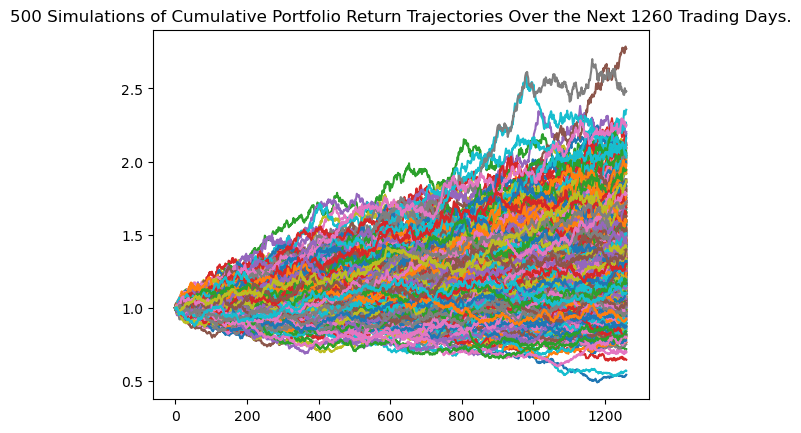

In [134]:
# Plot simulation outcomes
line_plot_10yr = mc_stock_data_10yr.plot_simulation()

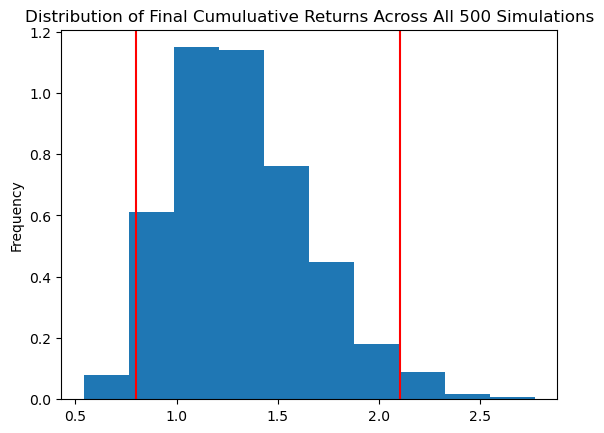

In [135]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = mc_stock_data_10yr.plot_distribution()

In [136]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stat_10yr = mc_stock_data_10yr.summarize_cumulative_return()

# Print summary statistics
print(summ_stat_10yr)

count           500.000000
mean              1.324230
std               0.342520
min               0.541991
25%               1.062228
50%               1.285878
75%               1.512959
max               2.770317
95% CI Lower      0.801109
95% CI Upper      2.102873
Name: 1260, dtype: float64


In [137]:
# Set initial investment
# Initital investment increased by 65%
initial_investment = 60000 * 1.65

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summ_stat_10yr[8]*initial_investment,2)
ci_upper_ten = round(summ_stat_10yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $99000.0 in the portfolio over the next 10 years will end within in the range of $79309.76 and $208184.4
